In [17]:
from keras.datasets import fashion_mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [18]:
# 1. 데이터 생성
# train set과 test set 분류
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

# data preprocessing
X_train = X_train.reshape((60000,28*28)).astype('float32')/255.0
X_test = X_test.reshape((10000,28*28)).astype('float32')/255.0

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# validation을 위한 data set(train set의 30%)
X_val = X_train[:42000]
X_train = X_train[42000:]
y_val = y_train[:42000]
y_train = y_train[42000:]

In [19]:
# 2.modeling
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# modeling seting
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [20]:
# 3. modeling and dropout
model_drop = models.Sequential()
model_drop.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model_drop.add(layers.Dropout(0.5)) 
model_drop.add(layers.Dense(512, activation='relu'))
model_drop.add(layers.Dropout(0.5)) 
model_drop.add(layers.Dense(512, activation='relu'))
model_drop.add(layers.Dropout(0.5)) 
model_drop.add(layers.Dense(10, activation='softmax'))

# modeling seting
model_drop.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [21]:
fashion_mnist = model.fit(X_train,y_train,epochs = 20,batch_size=128,validation_data =(X_val,y_val))

Train on 18000 samples, validate on 42000 samples
Epoch 1/20
18000/18000 [==============================] - 7s 366us/step - loss: 0.6866 - acc: 0.7502 - val_loss: 0.5526 - val_acc: 0.7950
Epoch 2/20
18000/18000 [==============================] - 7s 380us/step - loss: 0.4395 - acc: 0.8352 - val_loss: 0.4175 - val_acc: 0.8508
Epoch 3/20
18000/18000 [==============================] - 6s 357us/step - loss: 0.3800 - acc: 0.8568 - val_loss: 0.4393 - val_acc: 0.8446
Epoch 4/20
18000/18000 [==============================] - 8s 467us/step - loss: 0.3447 - acc: 0.8701 - val_loss: 0.3785 - val_acc: 0.8640
Epoch 5/20
18000/18000 [==============================] - 8s 445us/step - loss: 0.3070 - acc: 0.8839 - val_loss: 0.3531 - val_acc: 0.8737
Epoch 6/20
18000/18000 [==============================] - 7s 379us/step - loss: 0.2828 - acc: 0.8930 - val_loss: 0.3726 - val_acc: 0.8680
Epoch 7/20
18000/18000 [==============================] - 8s 420us/step - loss: 0.2932 - acc: 0.8914 - val_loss: 0.4789 - 

In [22]:
fashion_mnist_drop = model_drop.fit(X_train,y_train,epochs = 20,batch_size=128,validation_data =(X_val,y_val))

Train on 18000 samples, validate on 42000 samples
Epoch 1/20
18000/18000 [==============================] - 7s 391us/step - loss: 0.9227 - acc: 0.6658 - val_loss: 0.5323 - val_acc: 0.8069
Epoch 2/20
18000/18000 [==============================] - 7s 382us/step - loss: 0.5832 - acc: 0.7889 - val_loss: 0.4811 - val_acc: 0.8275
Epoch 3/20
18000/18000 [==============================] - 7s 374us/step - loss: 0.5236 - acc: 0.8098 - val_loss: 0.4492 - val_acc: 0.8321
Epoch 4/20
18000/18000 [==============================] - 8s 437us/step - loss: 0.4900 - acc: 0.8236 - val_loss: 0.4185 - val_acc: 0.8447
Epoch 5/20
18000/18000 [==============================] - 9s 482us/step - loss: 0.4626 - acc: 0.8333 - val_loss: 0.4010 - val_acc: 0.8533
Epoch 6/20
18000/18000 [==============================] - 8s 448us/step - loss: 0.4409 - acc: 0.8400 - val_loss: 0.4126 - val_acc: 0.8460
Epoch 7/20
18000/18000 [==============================] - 7s 411us/step - loss: 0.4237 - acc: 0.8468 - val_loss: 0.3932 - 

In [23]:
# train set 학습 모델 평가
test_loss, test_acc = model.evaluate(X_test,y_test)
print(test_loss,test_acc)

10000/10000 [==============================] - 1s 124us/step
0.48455869435071947 0.8730999827384949


In [24]:
# drop out 학습모델 평가
drop_loss,drop_acc =model_drop.evaluate(X_test,y_test)
print(drop_loss,drop_acc)

10000/10000 [==============================] - 1s 119us/step
0.3784829296827316 0.8673999905586243


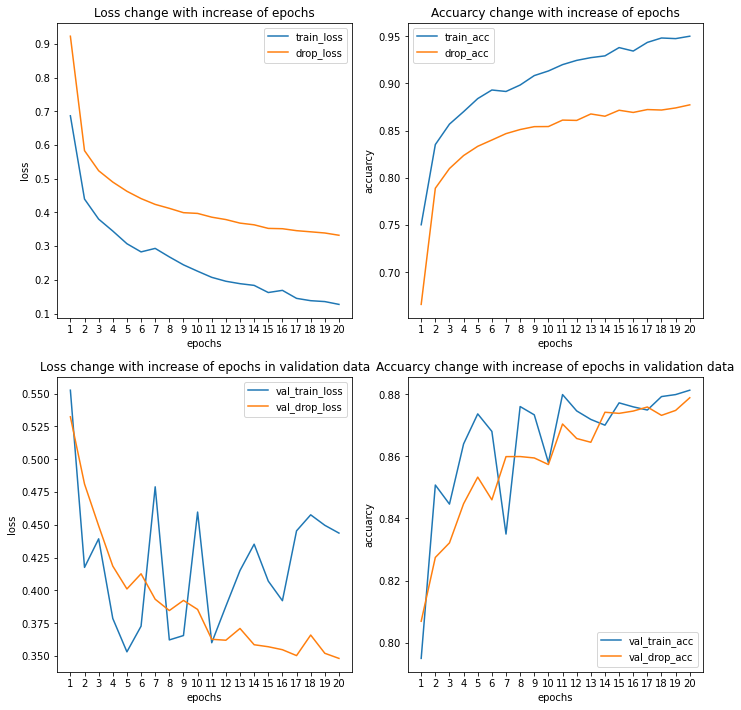

In [44]:
# train set과 validation set의 epoch의 따른 loss와 accuracy 변화
plt_row = 6
plt_col = 6
plt.rcParams['figure.figsize'] = (10,10)

fig = plt.figure()
x = np.arange(1,21)
fashion_mnist_dict = fashion_mnist.history
loss = fashion_mnist_dict['loss']
acc = fashion_mnist_dict['acc']
val_loss = fashion_mnist_dict['val_loss']
val_acc = fashion_mnist_dict['val_acc']

drop_dict = fashion_mnist_drop.history
drop_loss = drop_dict['loss']
drop_acc = drop_dict['acc']
val_drop_loss = drop_dict['val_loss']
val_drop_acc = drop_dict['val_acc']

# plot
plt.subplot(221)
plt.title('Loss change with increase of epochs')
plt.plot(x,loss,label = 'train_loss')
plt.plot(x,drop_loss,label='drop_loss')
plt.xticks(np.arange(1,21,1))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(222)
plt.title('Accuarcy change with increase of epochs')
plt.plot(x,acc,label = 'train_acc')
plt.plot(x,drop_acc,label = 'drop_acc')
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.xticks(np.arange(1,21,1))
plt.legend()

plt.subplot(223)
plt.title('Loss change with increase of epochs in validation data')
plt.plot(x,val_loss,label = 'val_train_loss')
plt.plot(x,val_drop_loss,label = 'val_drop_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.xticks(np.arange(1,21,1))
plt.legend()

plt.subplot(224)
plt.title('Accuarcy change with increase of epochs in validation data')
plt.plot(x,val_acc,label = 'val_train_acc')
plt.plot(x,val_drop_acc,label = 'val_drop_acc')
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.xticks(np.arange(1,21,1))
plt.legend()

fig.tight_layout(pad =1.2)
plt.legend()
plt.show()


위의 두개의 그래프는 train set에서 drop out 과정이 없는 모델과 drop out 과정이 있는 모델의 loss과 accuarcy를 보여주는 그래프이고
아래 두개의 그래프는 validation set에서 drop out 과정이 없는 모델과 drop out 과정이 있는 모델의 loss와 accuaracy를 보여주는 그래프이다.
drop out을 함에 따라 train set에서 loss는 높아지고, accuarcy는 떨어졌다. 하지만 validation set을 보면 train set에서의 validation data의 loss와 accuarcy가 drop out을 함에 따라 loss는 줄어들고, accuracy는 높아지는 경향을 보였다.

In [45]:
# modeling 한 결과로 fashion mnist 데이터 분류
y_pred = model.predict(X_test)

In [46]:
# 첫번째 예측값
print(y_pred[0])
print(len(y_pred[0]))

# 이 10개의 값들은 0~9에 대응하는 예측 모델의 신뢰도를 뜻한다.

[4.0866176e-08 3.2516667e-08 4.4845465e-09 6.9859432e-08 2.7610263e-09
 2.8314346e-03 1.5151537e-08 1.1493877e-03 1.0444047e-07 9.9601895e-01]
10


In [47]:
# 첫번째 예측값의 가장 높은 신뢰도를 가지는 레이블
print(np.argmax(y_pred[0]))

9


In [48]:
# y_test데이터와 위의 예측 모델로 부터 얻은 결과값을 확인
print(np.argmax(y_test[0]))
# 이 결과값을 보면 예측 모델로 부터 얻은 결과값과 test set의 결과 값이 같음을 알 수 있다.

9


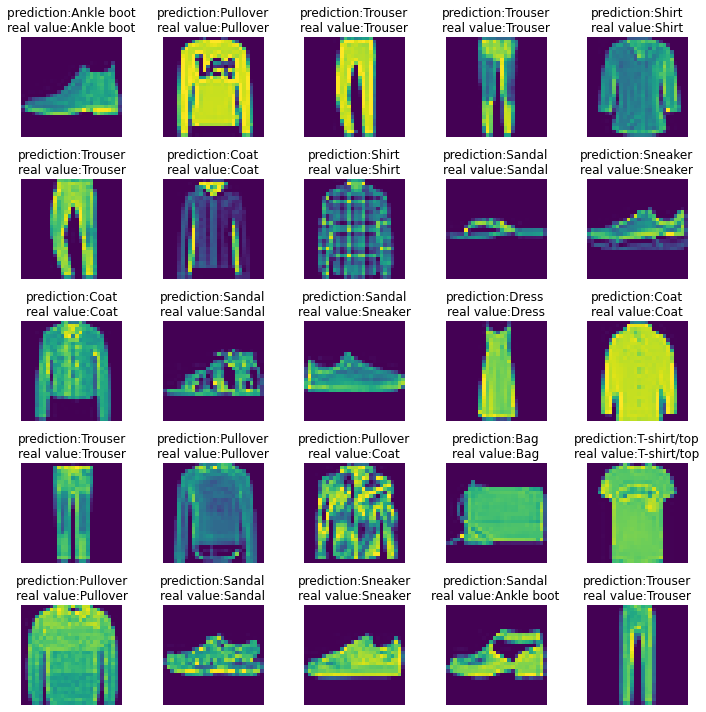

In [52]:
#  해당 결과를 image화를 해서 예측 결과와 image set과 비교해본다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)

axes = []
fig = plt.figure()

for i in range(plt_row*plt_col):
    X_test_plot = X_test[i].reshape(28,28)
    axes.append(fig.add_subplot(plt_row,plt_col,i+1))
    predict = np.argmax(y_pred[i])
    predict_name = class_names[predict]
    real = np.argmax(y_test[i])
    real_name = class_names[real]
    subplot_title = ("prediction:"+str(predict_name)+"\n"+"real value:"+ str(real_name))
    axes[-1].set_title(subplot_title)
    axes[-1].axis('off')
    plt.imshow(X_test_plot)
    
fig.tight_layout()
plt.show()   

위의 modeling을 통해 얻은 결과를 이미지화를 한 figure들이다. 25개의 sample들 가운데 3가지는 틀린 결과로 예측을 했다.

In [53]:
# Drop out의 과정을 넣은 model을 통한 fashion mnist 데이터 분류
y_drop_pred = model_drop.predict(X_test)

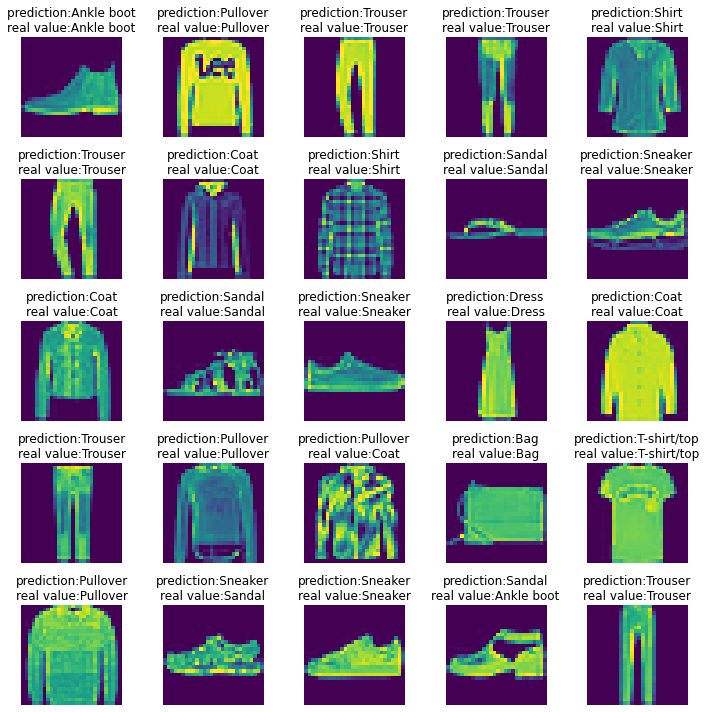

In [54]:
#  해당 결과를 image화를 해서 예측 결과와 image set과 비교해본다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt_row = 5
plt_col = 5
plt.rcParams['figure.figsize'] = (10,10)

axes = []
fig = plt.figure()

for i in range(plt_row*plt_col):
    X_test_plot = X_test[i].reshape(28,28)
    axes.append(fig.add_subplot(plt_row,plt_col,i+1))
    predict = np.argmax(y_drop_pred[i])
    predict_name = class_names[predict]
    real = np.argmax(y_test[i])
    real_name = class_names[real]
    subplot_title = ("prediction:"+str(predict_name)+"\n"+"real value:"+ str(real_name))
    axes[-1].set_title(subplot_title)
    axes[-1].axis('off')
    plt.imshow(X_test_plot)
    
fig.tight_layout()
plt.show()   

In [ ]:
위의 sample들은 drop out 과정을 넣은 model을 통해서 얻은 결과로 앞서서 구한 모델과 같이 3가지의 sample은 틀린 추측을 했다.
Fashion MNIST 데이테의 정확도를 좀 더 높이기 위해서는 model 자체의 layer 수를 더 늘려보거나, 반복률을 늘린다면 좀더 높은 정확도를 가질 거라 
기대한다.